In [337]:
import numpy as np
import xgboost as xgb
import pandas as pd

In [338]:
train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [339]:
test_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)


In [340]:
print("shape of the test set",test_set.shape)
print(" shape of the train set",train_set.shape)

shape of the test set (16281, 15)
 shape of the train set (32561, 15)


In [341]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']


In [342]:

train_set.columns = col_labels
test_set.columns = col_labels

In [343]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


<h2>check missing data</h2>

In [344]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

### check classes in the columns

In [345]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [346]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [347]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [348]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [349]:
    train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [350]:
train_set['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [351]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [352]:
train_set['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [353]:
train_set['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [354]:
train_set.shape #

(32561, 15)

In [355]:
test_set.shape

(16281, 15)

In [356]:
#total_set= pd.concat([train_set,test_set], axis=0) withoout addingg indicator

## Adding an indicator column as Data_id where data_id=1 is for training set and o for test set

In [357]:
train_set['data_id']= 1 #before conacating data on axis=0 we are creating a column with 1 and 0. train set id will 1 and test 0. so that later on we can remove 

In [358]:
test_set['data_id']= 0

In [359]:
train_set.shape

(32561, 16)

In [360]:
train_set['data_id'].head()

0    1
1    1
2    1
3    1
4    1
Name: data_id, dtype: int64

In [361]:
#combine data
total_set=train_set.append(test_set)

In [362]:
total_set.shape

(48842, 16)

In [363]:
total_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,data_id
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.666660
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.471412
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [364]:
total_set.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [365]:
total_set['wage_class'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: wage_class, dtype: int64

## replace ? with NaN

In [366]:
import numpy as np
df1= total_set.replace({' ?':np.nan})

In [367]:
df1.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
data_id              0
dtype: int64

In [368]:
df1.shape

(48842, 16)

### Replacing NaN with unknown

In [369]:
#fillna with unknown
df1.fillna('unknown', inplace=True)

In [370]:
df1.isnull().sum() #no of nan to check if nan are replaced with unknown

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
data_id           0
dtype: int64

In [371]:
df1['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
unknown               2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [372]:
cols= df1.columns

In [373]:
cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'data_id'],
      dtype='object')

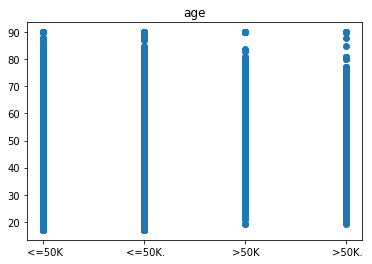

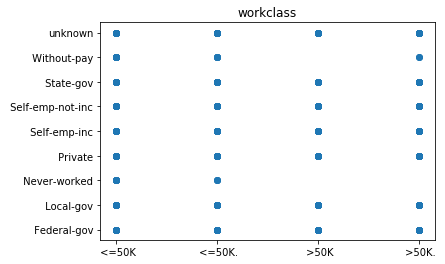

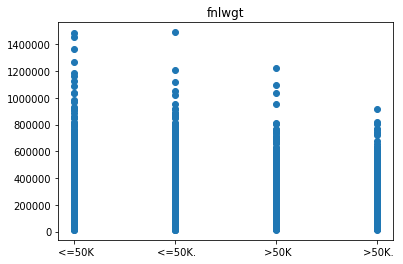

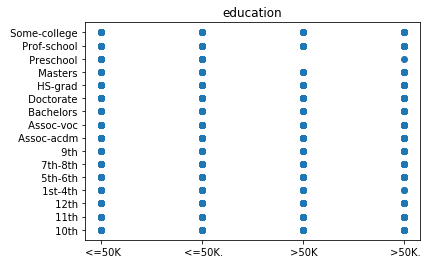

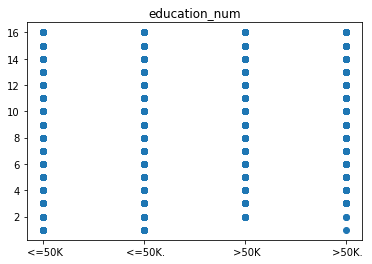

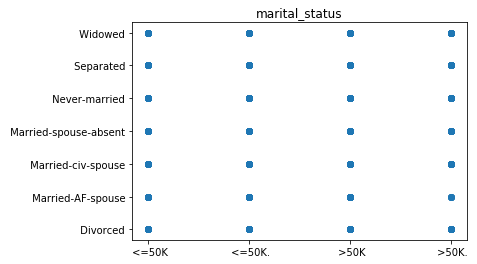

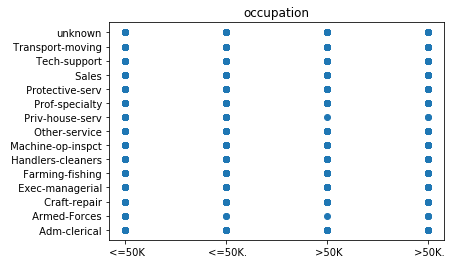

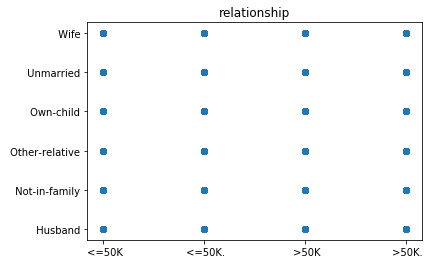

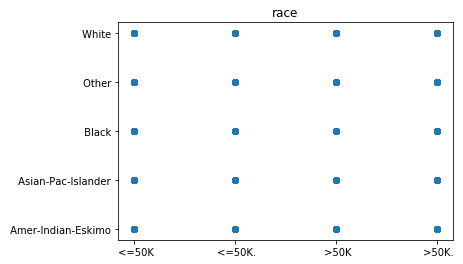

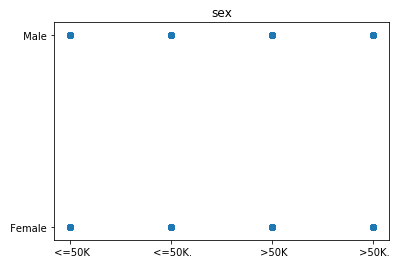

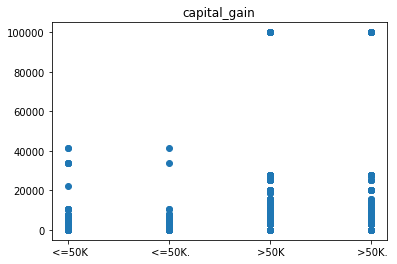

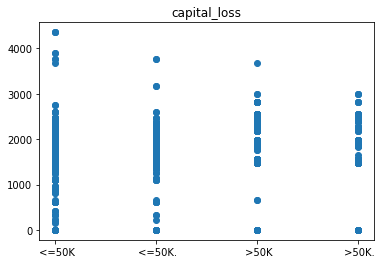

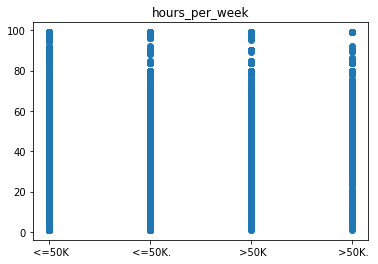

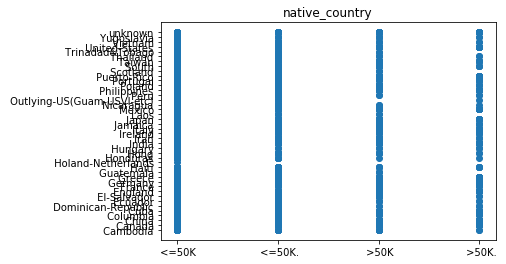

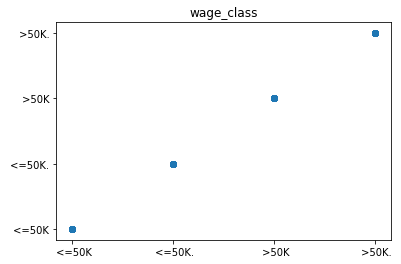

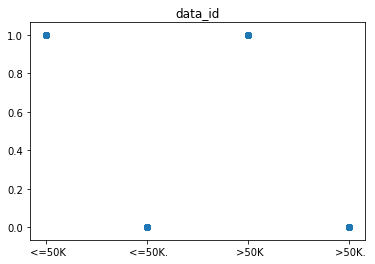

In [374]:
for i in list(df1.columns):
    plt.scatter(df1['wage_class'],df1[i])
    plt.title(i)
    plt.show()
    

In [375]:
#for col in cat_cols:
    #dummies=pd.get_dummies(df1[col],prefix=col)
   # df1 = df1.join(dummies)
   # df1 = df1.drop(col, axis = 1)
        

### Creating Label for dependant variable 

In [376]:
df1['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [377]:
df1['Target']=0

In [378]:
df1.loc[df1['wage_class']==' >50K','Target']=1

In [379]:
df1.loc[df1['wage_class']==' >50K.','Target']=1

In [380]:
df1.Target.value_counts()

0    37155
1    11687
Name: Target, dtype: int64

<h1>Feature Engineering</h1>

In [381]:
### 

In [382]:
cat_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

In [383]:
total_set['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

### copy of the df1

In [384]:
df2= df1.copy()

In [385]:
df2.shape

(48842, 17)

In [386]:
df2.Target.value_counts()

0    37155
1    11687
Name: Target, dtype: int64

### Work class

In [387]:

df2.loc[df2['workclass']==' Without -pay','work_class']='not_working'
df2.loc[df2['workclass']==' Never-worked','work_class']='not_working'

df2.loc[df2['workclass']==' Local-gov','work_class']='Gov_job'
df2.loc[df2['workclass']==' State-gov','work_class']='Gov_job'
df2.loc[df2['workclass']==' Federal-gov','work_class']='Gov_job'

df2.loc[df2['workclass']==' Self-emp-inc','work_class']='self_emp'
df2.loc[df2['workclass']==' Self-emp-not-inc','work_class']='self_emp'

df2.loc[df2['workclass']==' Private','work_class']='Private'

df2.loc[df2['workclass']=='unknown','work_class']='unknown'



In [388]:
dummies = pd.get_dummies(df2['work_class'], prefix = 'workclass')


In [389]:
df2 = pd.concat([df2,dummies],axis = 1)
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'data_id', 'Target', 'work_class', 'workclass_Gov_job',
       'workclass_Private', 'workclass_not_working', 'workclass_self_emp',
       'workclass_unknown'],
      dtype='object')

### Marital status

In [390]:
df2.marital_status.value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [391]:
df2['Marital_status']='Married'

df2.loc[df2['marital_status']==' Never-married','Marital_status']='Single'

df2.loc[df2['marital_status']==' Divorced','Marital_status']='Separated'
df2.loc[df2['marital_status']==' Separated','Marital_status']='Separated'
df2.loc[df2['marital_status']==' Widowed','Marital_status']='Separated'
df2.loc[df2['marital_status']==' Married-spouse-absent','Marital_status']='Separated'



In [392]:
df2['Marital_status'].value_counts()

Married      22416
Single       16117
Separated    10309
Name: Marital_status, dtype: int64

In [393]:
dummies = pd.get_dummies(df2['Marital_status'],prefix='Marital_status')
df2 = pd.concat([df2,dummies],axis = 1)


### Education

In [394]:
df2['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [395]:
df2['Education']='HS grad'

In [396]:
#<hs grad=['11th ','Assoc-acdm','10th','7th-8th','Prof-school','9th','12th','5th-6th','1st-4th','Preschool','Assoc-voc ']

In [397]:
edu_cat=[' Some-college',' Bachelors']

In [398]:

for cat in edu_cat:
    df2.loc[df2['education']==cat,'Education']='Bachelors'
    

In [399]:

df2.loc[df2['education']==' Doctorate','Education']='Masters'
df2.loc[df2['education']==' Masters','Education']='Masters'

In [400]:
df2.Education.value_counts()

HS grad      26688
Bachelors    18903
Masters       3251
Name: Education, dtype: int64

In [401]:
dummies = pd.get_dummies(df2['Education'],prefix='Education')
df2 = pd.concat([df2,dummies],axis = 1)

### Occupation

In [402]:
df2['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
unknown               2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [403]:
executives=[' Exec-managerial',' Prof-specialty']
Technicians=[' Craft-repair',' Machine-op-inspct',' Other-service',' Armed-Forces']
Workers=[' Transport-moving',' Handlers-cleaners',' Farming-fishing',' Protective-serv', ' Priv-house-serv']
sales=[' Adm-clerical',' Sales',' Tech-support']
unknown=['unknown']


In [404]:
for e in executives:
    df2.loc[df2['occupation']==e,'Occupation']='executives'
    

In [405]:
for e in Technicians:
    df2.loc[df2['occupation']==e,'Occupation']='Technicians'
for e in Workers:
    df2.loc[df2['occupation']==e,'Occupation']='Workers'
for e in sales:
    df2.loc[df2['occupation']==e,'Occupation']='sales'
for e in unknown:
    df2.loc[df2['occupation']==e,'Occupation']='unknown'

In [406]:
df2['Occupation'].unique()

array(['sales', 'executives', 'Workers', 'Technicians', 'unknown'],
      dtype=object)

In [407]:
df2['Occupation'].value_counts()

Technicians    14072
sales          12561
executives     12258
Workers         7142
unknown         2809
Name: Occupation, dtype: int64

In [408]:
dummies = pd.get_dummies(df2['Occupation'],prefix='Occupation')
df2 = pd.concat([df2,dummies],axis = 1)

### Race

In [409]:
df2['Race']='White'

In [410]:
df2.loc[df2['race']==' Black','Race']='Black'

df2.loc[df2['race']==' Asian-Pac-Islander','Race']='other'
df2.loc[df2['race']==' Amer-Indian-Eskimo','Race']='other'
df2.loc[df2['race']==' Other','Race']='other'



In [411]:
df2.Race.value_counts()

White    41762
Black     4685
other     2395
Name: Race, dtype: int64

In [412]:
dummies = pd.get_dummies(df2['Race'],prefix='Race')
df2 = pd.concat([df2,dummies],axis = 1)

### Relationship

In [413]:
df2.relationship.value_counts()

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

In [414]:
df2['Relationship']='spouse'
#spouse=[' Husband',' Wife']
relative=[' Not-in-family',' Other-relative']
unmarried=[' Own-child',' Unmarried']

In [415]:
for r in relative:
    df2.loc[df2['relationship']==r,'Relationship']='Relative'
for r in unmarried:
    df2.loc[df2['relationship']==r,'Relationship']='unmarried'


In [416]:
df2.Relationship.unique()
df2.Relationship.value_counts()


spouse       22047
Relative     14089
unmarried    12706
Name: Relationship, dtype: int64

In [417]:
dummies = pd.get_dummies(df2['Relationship'],prefix='Relationship')
df2 = pd.concat([df2,dummies],axis = 1)

### Native_country

In [418]:
df2['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [419]:
#America=[' United-States',' South',' Cuba',' Jamaica',' Mexico',' Puerto-Rico',' Honduras',' Canada',' Columbia',' Ecuador',' Laos',' Haiti',' Dominican-Republic',' El-Salvador',' Peru',' Guatemala',' Outlying-US(Guam-USVI-etc)',' Trinadad&Tobago',' Nicaragua']

In [420]:
Europe=[' England',' Germany',' Italy',' Poland',' Portugal',' France',' Yugoslavia',' Scotland',' Greece',' Ireland',' Hungary',' Holand-Netherlands']

In [421]:
Asia=[' India',' Iran',' Philippines',' Cambodia',' Thailand',' Taiwan',' China',' Japan',' Vietnam',' Hong',]

In [422]:
df2['Native_country']='America'

In [423]:
for e in Europe:
    df2.loc[df2['native_country']==e,'Native_country']='Europe'

for e in Asia:
    df2.loc[df2['native_country']==e,'Native_country']='Asia'    

df2.loc[df2['native_country']=='unknown','Native_country']='unknown'    


In [424]:
df2.Native_country.value_counts()


America    46247
Asia         958
unknown      857
Europe       780
Name: Native_country, dtype: int64

In [425]:
dummies = pd.get_dummies(df2['Native_country'],prefix='Country')
df2 = pd.concat([df2,dummies],axis = 1)

In [426]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'data_id', 'Target', 'work_class', 'workclass_Gov_job',
       'workclass_Private', 'workclass_not_working', 'workclass_self_emp',
       'workclass_unknown', 'Marital_status', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single', 'Education',
       'Education_Bachelors', 'Education_HS grad', 'Education_Masters',
       'Occupation', 'Occupation_Technicians', 'Occupation_Workers',
       'Occupation_executives', 'Occupation_sales', 'Occupation_unknown',
       'Race', 'Race_Black', 'Race_White', 'Race_other', 'Relationship',
       'Relationship_Relative', 'Relationship_spouse',
       'Relationship_unmarried', 'Native_country', 'Country_America',
       'Country_Asia', 'Country_Europe', 'Country_unknown'],
      dtype='obje

## Removing old redundant columns from the df2

In [427]:
dropped=df2.drop(columns=['wage_class','workclass','work_class','Education','education','marital_status','Marital_status','Occupation','occupation','relationship','Relationship','race','Race','native_country','Native_country'],axis=1,inplace=True)

In [428]:
df2.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'data_id', 'Target', 'workclass_Gov_job',
       'workclass_Private', 'workclass_not_working', 'workclass_self_emp',
       'workclass_unknown', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single',
       'Education_Bachelors', 'Education_HS grad', 'Education_Masters',
       'Occupation_Technicians', 'Occupation_Workers', 'Occupation_executives',
       'Occupation_sales', 'Occupation_unknown', 'Race_Black', 'Race_White',
       'Race_other', 'Relationship_Relative', 'Relationship_spouse',
       'Relationship_unmarried', 'Country_America', 'Country_Asia',
       'Country_Europe', 'Country_unknown'],
      dtype='object')

In [429]:
df2.shape

(48842, 35)

### Label encoding 'sex' column

In [430]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df2['sex'])
df2['sex']=le.transform(df2['sex']) #tranforming train and test data
#test_data[col]=le.transform(test_data[col])

In [431]:
training_set = df2[df2["data_id"] == 1]
testing_set=df2[df2['data_id']==0]

In [432]:
training_set.shape

(32561, 35)

In [433]:
testing_set.shape

(16281, 35)

In [434]:
testing_set['Target'].value_counts()

0    12435
1     3846
Name: Target, dtype: int64

In [435]:
# features
y= training_set.pop('Target')

In [436]:
X=training_set

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)

### Problem 1: Prediction task is to determine whether a person makes over 50K a year.

#### to determine we build a logistic model as we have binary classifiaction problem and later on we'll apply tree base model also.


In [438]:
from sklearn.linear_model import LogisticRegression

In [439]:
logreg= LogisticRegression(C=0.001)

In [440]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [441]:
# use the model to make predictions with the test data
y_pred = logreg.predict(X_val)

In [442]:
# how did our model perform?
import sklearn
count_misclassified = (y_val != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1984
Accuracy: 0.80


In [443]:
#Testing set

test_y=testing_set.pop('Target')
test_X= testing_set

In [444]:
test_pred= logreg.predict(test_X)

In [445]:
# how did our model perform on testing set?
import sklearn
count_misclassified = (test_y != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = sklearn.metrics.accuracy_score(test_y, test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 3266
Accuracy: 0.80


#### now we'll run decision tree classifier

In [446]:
from sklearn.tree import DecisionTreeClassifier

In [447]:
dtree= DecisionTreeClassifier()

In [448]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [449]:
dtree_pred= dtree.predict(X_val)

In [450]:
# how did our model perform on validation set using dtree?
import sklearn
count_misclassified = (y_test != dtree_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = sklearn.metrics.accuracy_score(y_val, dtree_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1842
Accuracy: 0.81


#### can see there is very small increase in the accuracy of model using decision tree.


### Now we are going to useRandom forest classifier for this problem.


In [451]:
from sklearn.ensemble import RandomForestClassifier

In [452]:
RFC= RandomForestClassifier()

In [453]:
RFC.fit(X_train,y_train) # fitting random forest classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [454]:
RFC_pred= RFC.predict(X_val)

In [455]:
# how did our model perform on validation set using RFC?
count_misclassified = (y_test != RFC_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))


Misclassified samples: 1539


In [456]:
accuracy = sklearn.metrics.accuracy_score(y_val, RFC_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


#### Random forest classifier using 100 iterations

In [457]:
### increasing no of estimators to 100 lets see how much it helps.
RFC1= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [458]:
RFC1.fit(X_train,y_train) #Fitting tuned random forst model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [459]:
RFC1_pred= RFC1.predict(X_val) #predicting using RFC1

In [460]:
accuracy = sklearn.metrics.accuracy_score(y_val, RFC1_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


In [461]:
#testing set
RFC1_pred_test= RFC1.predict(test_X)

In [462]:
accuracy = sklearn.metrics.accuracy_score(test_y, RFC1_pred_test)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


In [463]:
## for testing set it gives 85% of accuracy 

### XGBoost implementation

In [464]:
import xgboost as xgb

In [465]:
#dmarices for train test and validation set
xgbtrain = xgb.DMatrix(X_train, label = y_train)
xgbtest = xgb.DMatrix(test_X)
xgbval = xgb.DMatrix(X_val, label = y_val) 


In [466]:
X_train.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'data_id', 'workclass_Gov_job', 'workclass_Private',
       'workclass_not_working', 'workclass_self_emp', 'workclass_unknown',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single', 'Education_Bachelors', 'Education_HS grad',
       'Education_Masters', 'Occupation_Technicians', 'Occupation_Workers',
       'Occupation_executives', 'Occupation_sales', 'Occupation_unknown',
       'Race_Black', 'Race_White', 'Race_other', 'Relationship_Relative',
       'Relationship_spouse', 'Relationship_unmarried', 'Country_America',
       'Country_Asia', 'Country_Europe', 'Country_unknown'],
      dtype='object')

In [468]:
# to see out output 
watchlist = [(xgbtrain,'train'),(xgbval, 'eval')]

In [473]:
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'error'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [474]:
#Running the model with 150 iterations and parameters defined above

num_rounds = 150
model_cv = xgb.train(plst, xgbtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-error:0.143252	eval-error:0.146381
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 10 rounds.
[1]	train-error:0.137066	eval-error:0.145358
[2]	train-error:0.134872	eval-error:0.144129
[3]	train-error:0.133687	eval-error:0.140751
[4]	train-error:0.133687	eval-error:0.142594
[5]	train-error:0.134126	eval-error:0.142287
[6]	train-error:0.133029	eval-error:0.141775
[7]	train-error:0.133073	eval-error:0.142184
[8]	train-error:0.133029	eval-error:0.14157
[9]	train-error:0.131669	eval-error:0.141468
[10]	train-error:0.133161	eval-error:0.141468
[11]	train-error:0.131976	eval-error:0.141877
[12]	train-error:0.131318	eval-error:0.140956
[13]	train-error:0.131099	eval-error:0.141366
Stopping. Best iteration:
[3]	train-error:0.133687	eval-error:0.140751



Here  we have used is evaluation metric as 'error' which is binary classification error. classification error is opposite to the accuracy so eval-error is 0.14 we can get determine accuracy 1-0.14=0.85.


In [475]:
### AUC Area under the curve
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'auc'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [476]:
num_rounds = 150
model_cv = xgb.train(plst, xgbtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-auc:0.902697	eval-auc:0.895441
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.914359	eval-auc:0.907219
[2]	train-auc:0.917578	eval-auc:0.908661
[3]	train-auc:0.919538	eval-auc:0.909848
[4]	train-auc:0.919977	eval-auc:0.910789
[5]	train-auc:0.920532	eval-auc:0.91137
[6]	train-auc:0.921022	eval-auc:0.912028
[7]	train-auc:0.921074	eval-auc:0.912098
[8]	train-auc:0.922149	eval-auc:0.912589
[9]	train-auc:0.922511	eval-auc:0.913005
[10]	train-auc:0.923089	eval-auc:0.913526
[11]	train-auc:0.923352	eval-auc:0.913456
[12]	train-auc:0.92418	eval-auc:0.914201
[13]	train-auc:0.924817	eval-auc:0.914632
[14]	train-auc:0.925506	eval-auc:0.914747
[15]	train-auc:0.925891	eval-auc:0.915089
[16]	train-auc:0.926797	eval-auc:0.915303
[17]	train-auc:0.927129	eval-auc:0.915376
[18]	train-auc:0.92751	eval-auc:0.915487
[19]	train-auc:0.927947	eval-auc:0.916099
[20]	train-auc:0.928654	eval-auc

In [480]:
#predicting testing set
testxg_pred = model_cv.predict(xgbtest)

In [477]:
### AUC is validation AUC=0.92 which indicates model is good.

In [485]:
print("Accuracy_score  using Logistic regression",0.80)
print("Accuracy_score  using Decision tree",0.81)
print("Accuracy_score  using Random forest",0.85)


Accuracy_score  using Logistic regression 0.8
Accuracy_score  using Decision tree 0.81
Accuracy_score  using Random forest 0.85


### Problem 2: Which factors are important?
Ans: Top 10 features are plotted using fscore.

In [478]:
feat_imp = pd.Series(model_cv.get_fscore()).sort_values(ascending=False)

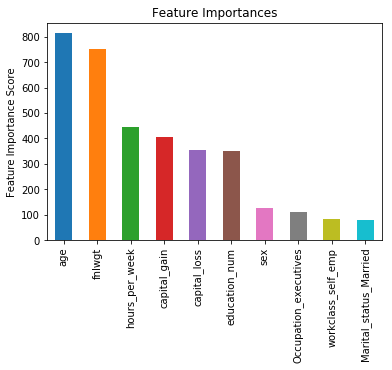

In [479]:
import matplotlib.pyplot as plt
feat_imp[:10].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

### Problem 3:Which algorithms are best for this dataset?
#### After implementing 4 models we see that XgBoost models is best as it gives maximum accuracy and AUC.